In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append('/srv/code/odGAN/')

In [3]:
import numpy as np
from keras.datasets import mnist
from resources.models import DCGAN

Using TensorFlow backend.


### Auxiliary functions

In [4]:
def plot_images(images, cols=4, figsize=(10, 10)):
    
    rows = np.ceil(len(images)/cols)
    plt.figure(figsize=figsize)
    
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        plt.imshow(np.squeeze(image), cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

### Build DCGAN model

#### DCGAN parameters

In [5]:
input_dim = 100

In [6]:
dcgan = DCGAN(g_input_dim=input_dim)
dcgan.build()
dcgan.summary()

Generator model:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_1 (Batch (None, 12544)             50176     
_________________________________________________________________
activation_1 (Activation)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 256)       0   

### Train DCGAN

#### Read training data

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)  # will be used for pretraining

#### Fixed noise vectors to check generator

In [9]:
check_samples = 16
noise_samples = np.random.uniform(low=-1.0, high=1.0, size=(check_samples, input_dim))

#### (optional) Pre-train adversarial discriminator

In [11]:
dcgan.pretrain(x_test, batch_size=256, epochs=1)

Epoch 1/1
20000/20000 [==============================] - 341s - loss: 0.4080 - acc: 0.8230     

#### Main training loop

In [12]:
steps = 20
batch_size = 256

In [13]:
for step in range(steps):
    idx = np.random.randint(0, x_train.shape[0], size=batch_size)
    # i1, i2 = step*batch_size, (step + 1)*batch_size
    a_metrics, s_metrics = dcgan.train_on_batch(x_train[idx], freeze_discriminator=False)
    print(step, a_metrics, s_metrics)

0 [0.37834615, 0.9765625] [7.6345034, 0.0]
1 [7.573143, 0.5] [0.26635692, 0.8671875]
2 [1.956568, 0.51953125] [11.087582, 0.0]
3 [1.5042309, 0.54101562] [5.1222382, 0.0546875]
4 [0.78408968, 0.63085938] [0.19143274, 0.921875]
5 [0.022449479, 1.0] [0.053057022, 0.984375]
6 [0.034400191, 1.0] [0.022679875, 0.9921875]
7 [0.045126606, 1.0] [0.020732107, 0.99609375]
8 [0.053003356, 1.0] [0.010334047, 1.0]
9 [0.12922582, 0.99609375] [0.013141176, 1.0]
10 [0.077990323, 1.0] [0.0064218012, 1.0]
11 [0.11691077, 0.99804688] [0.021020431, 0.9921875]
12 [0.098224461, 1.0] [0.01581938, 0.99609375]
13 [0.10448878, 1.0] [0.022376552, 0.9921875]
14 [0.11229318, 1.0] [0.0095000332, 0.99609375]
15 [0.11253264, 1.0] [0.0028451071, 1.0]
16 [0.11414517, 1.0] [0.020291001, 0.99609375]
17 [0.1161851, 1.0] [0.042725652, 0.984375]
18 [0.11938738, 1.0] [0.0025996361, 1.0]
19 [0.14671494, 0.99804688] [0.0065462533, 0.99609375]


In [18]:
generated_images = dcgan.generate(16)

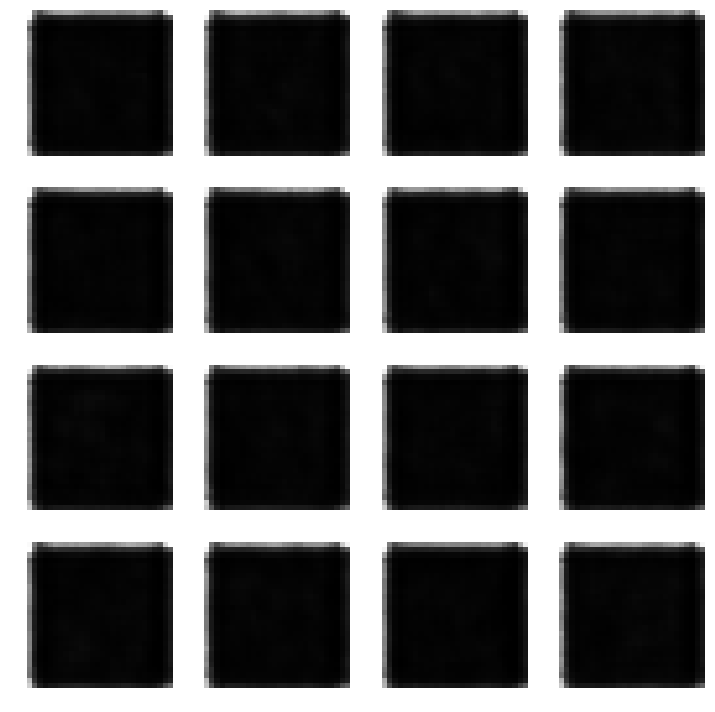

In [21]:
plot_images(generated_images)

In [23]:
print(dcgan.discriminate(generated_images))
print(dcgan.discriminate(x_test[:16]))

[[ 0.19778286]
 [ 0.2009507 ]
 [ 0.19965944]
 [ 0.19863242]
 [ 0.19884826]
 [ 0.19981118]
 [ 0.19716249]
 [ 0.20111977]
 [ 0.20050649]
 [ 0.20039228]
 [ 0.19751914]
 [ 0.1998177 ]
 [ 0.19618435]
 [ 0.19745123]
 [ 0.20159426]
 [ 0.1987128 ]]
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
